In [1]:
import sys
import pandas as pd
import numpy as np
from numpy import absolute, mean, sort, std

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

from sklearn import datasets, metrics, preprocessing, model_selection
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, cross_val_score, cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV, validation_curve, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, max_error

import skopt
from skopt import BayesSearchCV 

from missingpy import MissForest

import shap
from BorutaShap import BorutaShap

import xgboost
import lightgbm
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt
import missingno as msno

seed = 0

 
data = pd.read_csv("training_cleaned.csv", header=0, sep=",")

data["label_encoded"] = data["label"].map(
    {"most likely": 1, "probable": 0.75, "least likely": 0.1}
)
Y = data["label_encoded"]
data = data.drop(["label"], 1)

X = pd.read_csv("imputed_training_data.csv", header=0)
X.columns = [
    regex.sub("_", col) if any(x in str(col) for x in set(("[", "]", "<"))) else col
    for col in X.columns.values
]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=seed
)


In [2]:
model = GradientBoostingRegressor(criterion='mse', learning_rate=0.17398091718619346,
                          max_features='sqrt', n_estimators=50, random_state=0)

Feature_Selector = BorutaShap(model=model, importance_measure="shap", classification=False)

Feature_Selector.fit(X=X, y=Y, n_trials=200, random_state=seed)

subset = Feature_Selector.Subset()
X_boruta_sel = subset
Feature_Selector.TentativeRoughFix()

  0%|          | 0/200 [00:00<?, ?it/s]

17 attributes confirmed important: ['Spleen_GTExTPM', 'Ovary_GTExTPM', 'GDI_Score', 'Whole Blood_GTExTPM', 'HIPred', 'Lung_GTExTPM', 'Liver_GTExTPM', 'Heart - Atrial Appendage_GTExTPM', 'Testis_GTExTPM', 'Pituitary_GTExTPM', 'Kidney - Cortex_GTExTPM', 'pLI_ExAC', 'humanScore_Exomiser', 'Cells - Cultured fibroblasts_GTExTPM', 'Small Intestine - Terminal Ileum_GTExTPM', 'Brain - Amygdala_GTExTPM', 'Adrenal Gland_GTExTPM']
9 attributes confirmed unimportant: ['Skin - Not Sun Exposed (Suprapubic)_GTExTPM', 'fishScore_Exomiser', 'SignalValue_H3k4me3_median', 'ppiScore_Exomiser', 'Cells - EBV-transformed lymphocytes_GTExTPM', 'mouseScore_Exomiser', 'RVIS_Score', 'CNVs_ExAC', 'SignalValue_H3k4me1_median']
1 tentative attributes remains: ['Nerve - Tibial_GTExTPM']
0 tentative features are now accepted: []
1 tentative features are now rejected: ['Nerve - Tibial_GTExTPM']


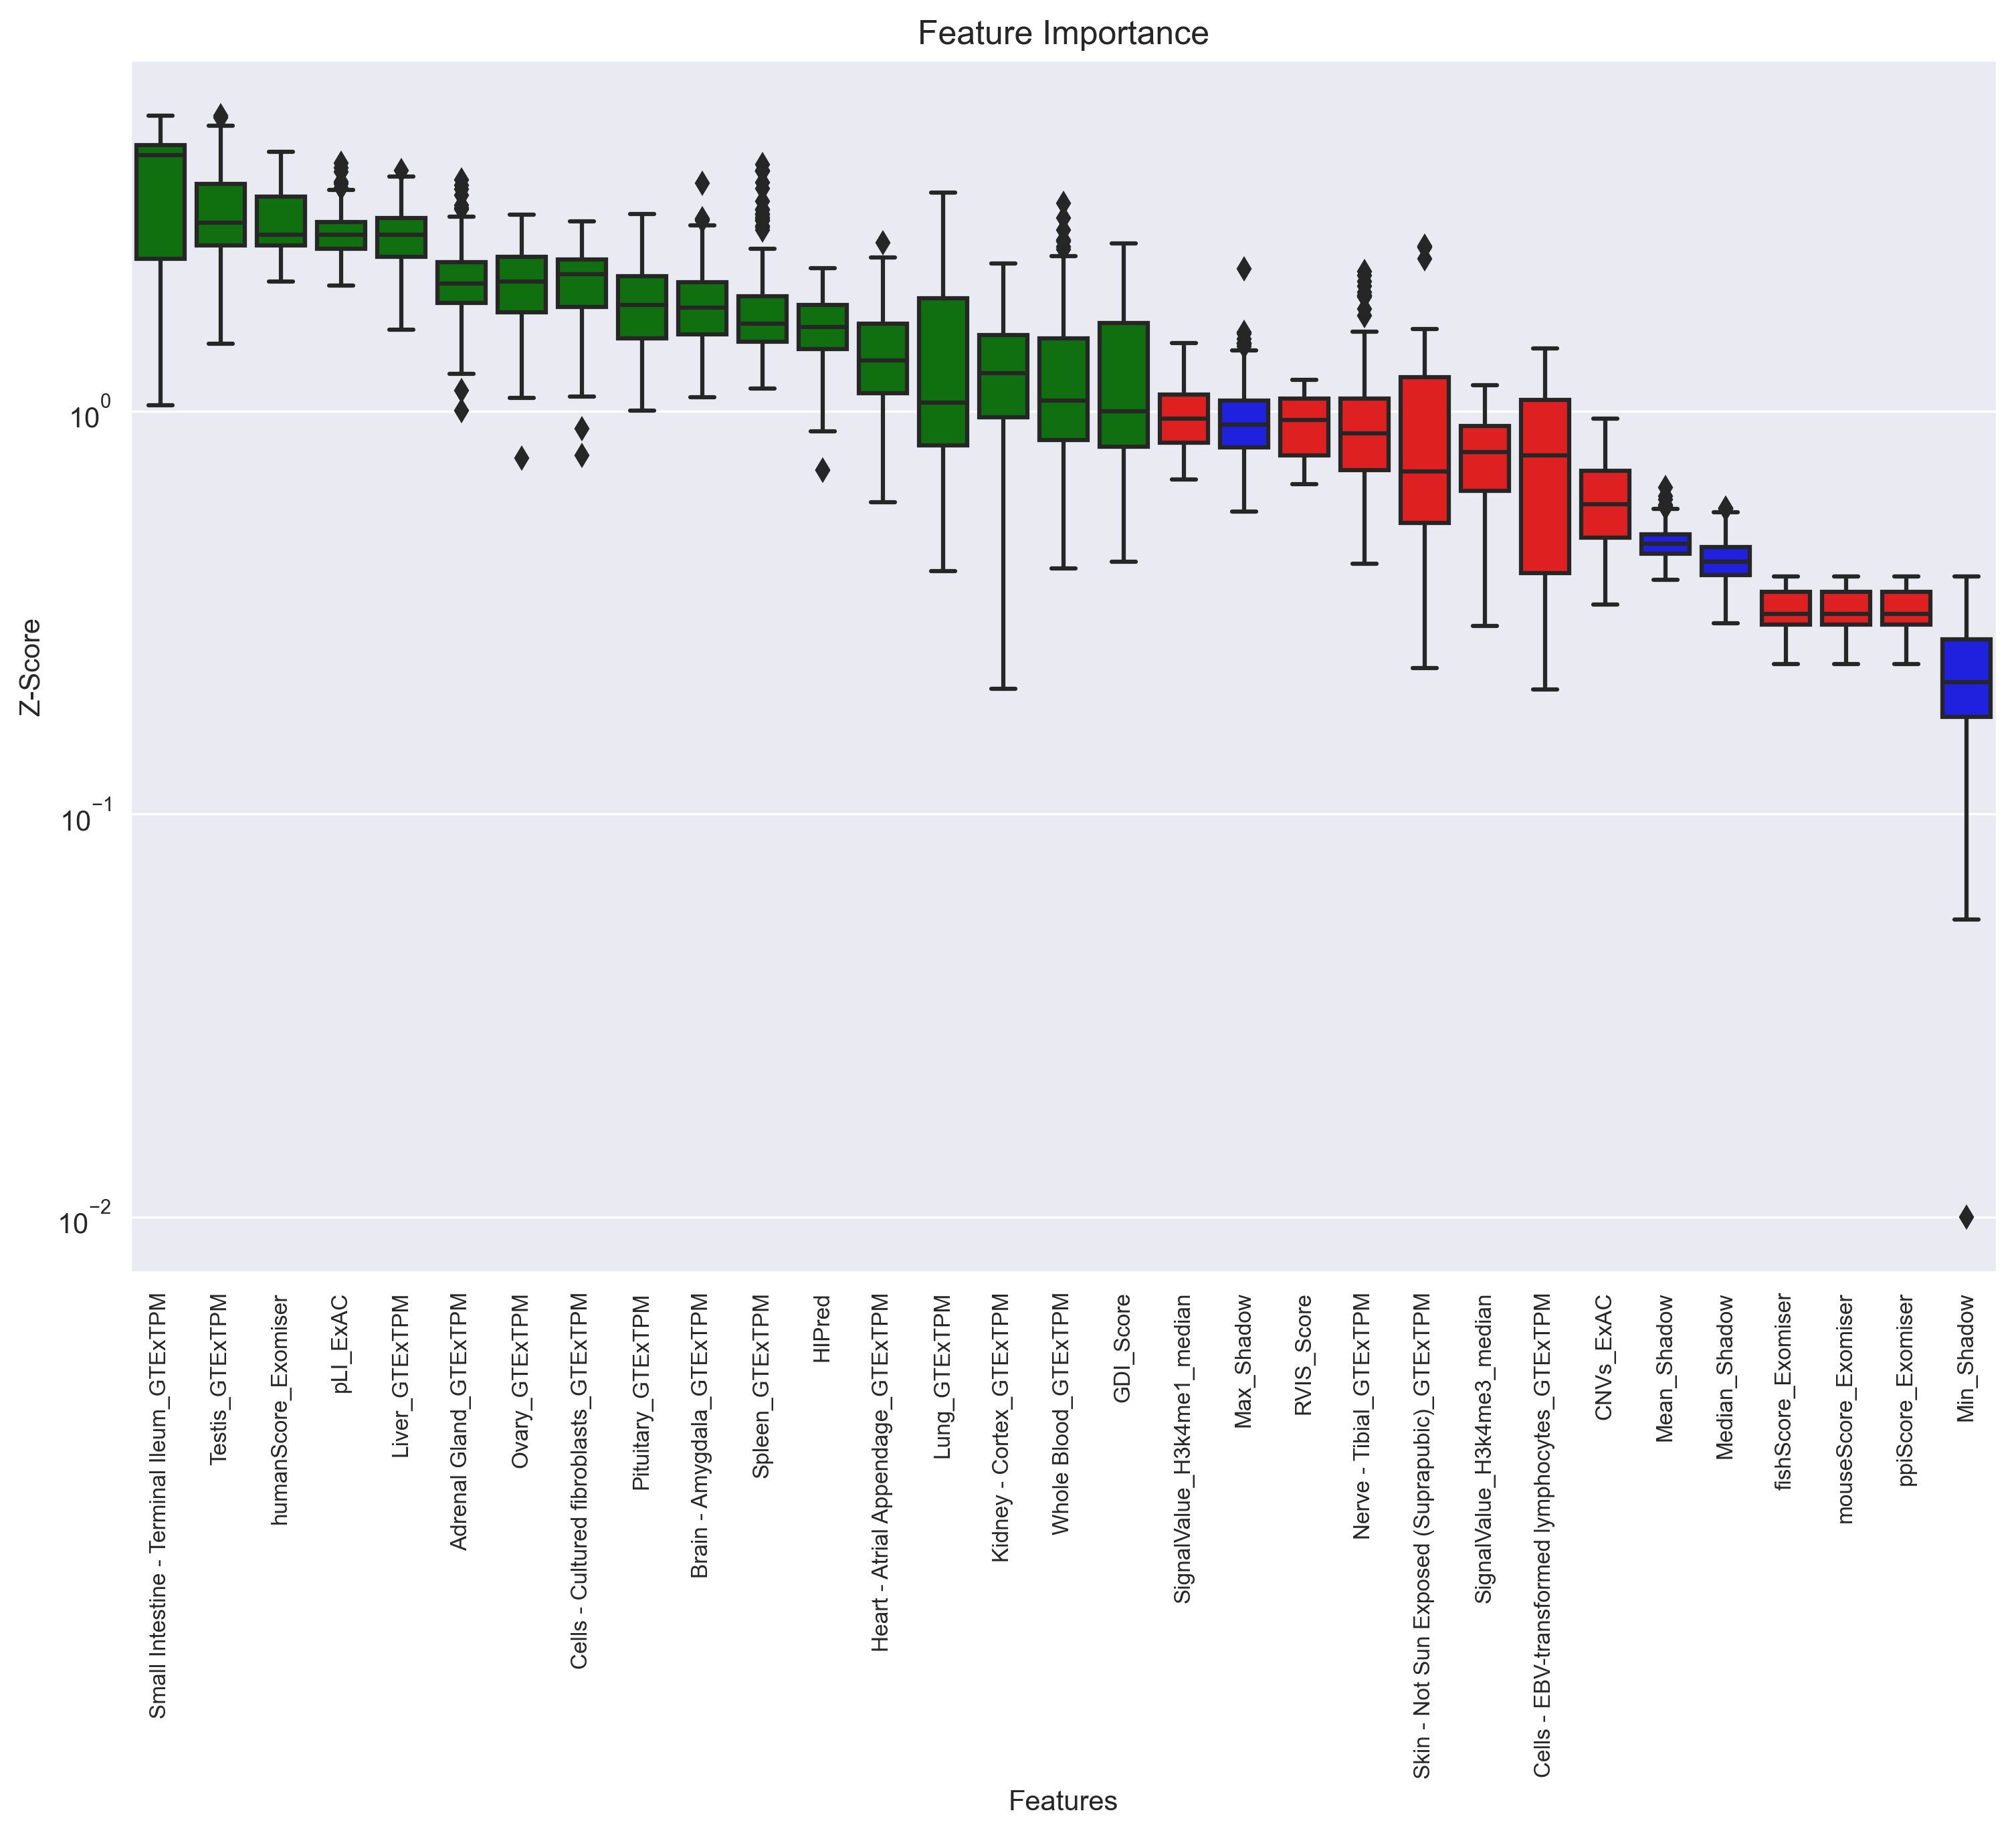

In [4]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
sns.set_style("darkgrid")
sns.mpl.rcParams["figure.figsize"] = (30.0, 9.0)
Feature_Selector.plot(which_features="all")